In [49]:
import cv2
import matplotlib.pyplot as plt

In [50]:
image_path = '/Users/sidneydancini/Downloads/case1.png'

PROBLEM FOUND AND OBJECTIVE

Mammograms with low contrast make the detection of microcalcifications difficult.
Very bright or dark areas hide subtle details.
Objective: Improve visibility without introducing artifacts that may confuse the diagnosis.

IMPORTANCE OF IMAGE ENHANCEMENT IN MAMMOGRAPHY

Early diagnosis of breast cancer depends on subtle details.
Radiologists need images with optimized contrast.
Any processing must preserve edges and anatomical structures.

In [52]:
# Show comparison of original and processed images
def show_comparison(original, processed, title_processed):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original, cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(processed, cmap='gray')
    axs[1].set_title(title_processed)
    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [53]:
# Open image in grayscale 
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  

IMAGE NEGATIVES

Reversing the intensity levels of a digital image in this manner produces the
equivalent of a photographic negative. This type of processing is used, for example,
in enhancing white or gray detail embedded in dark regions of an image, especially
when the black areas are dominant in size.

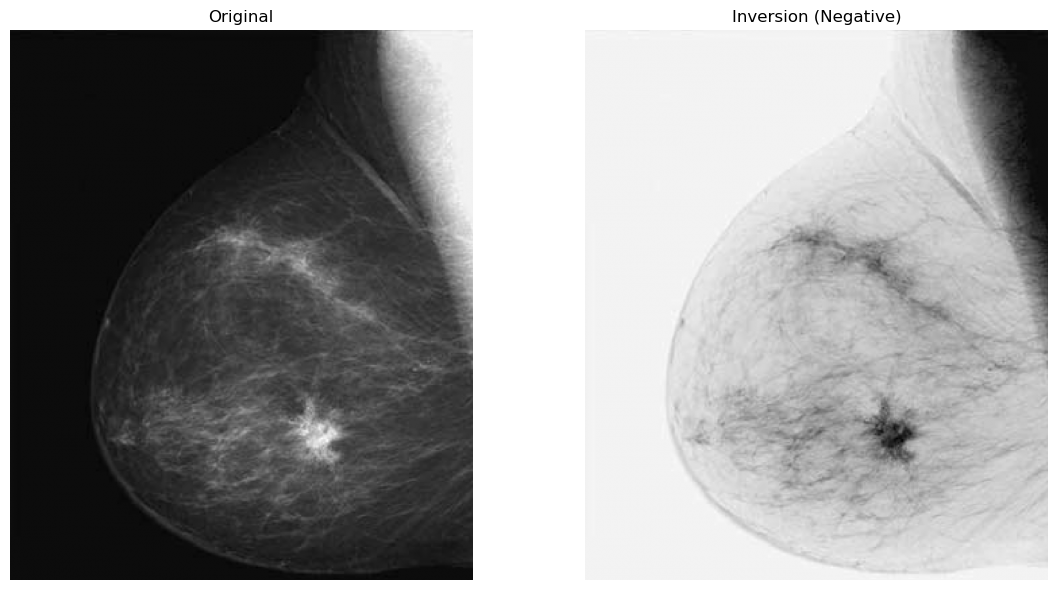

In [55]:
# 1 - Inversion (negative)
img_inverted = cv2.bitwise_not(img)
show_comparison(img, img_inverted, 'Inversion (Negative)')

CLAHE (Contrast Limited Adaptive Histogram Equalization) is an image processing technique that enhances local contrast in small regions of an image while limiting noise amplification. It’s especially useful for improving visibility in low-contrast areas without overexposing brighter regions.

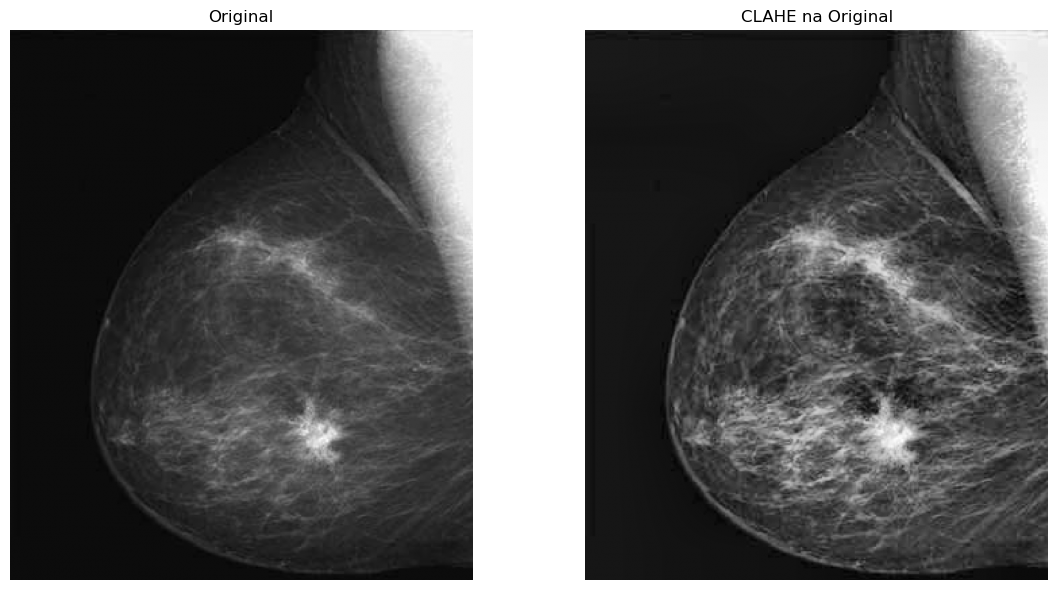

In [56]:
# 2 - Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img)
show_comparison(img, img_clahe, 'CLAHE na Original')

Gaussian filter is a smoothing technique that reduces image noise and detail by averaging pixel values with a weighted Gaussian kernel. It's commonly used before edge detection to prevent false edges caused by noise.

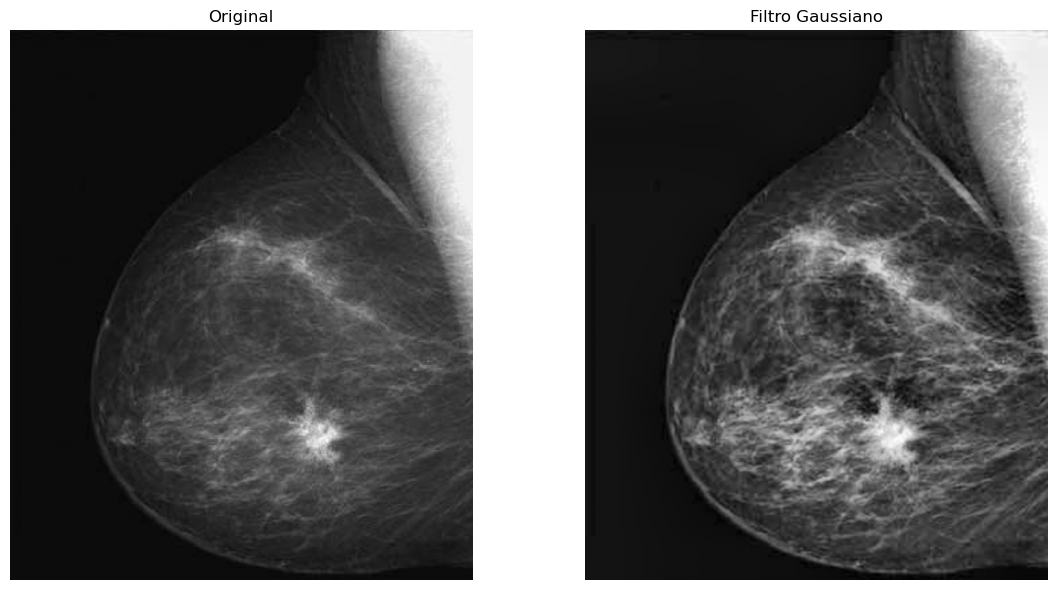

In [57]:
# 3 - Apply Gaussian Blur in CLAHE image
img_blur = cv2.GaussianBlur(img_clahe, (5,5), 0)
show_comparison(img, img_blur, 'Filtro Gaussiano')

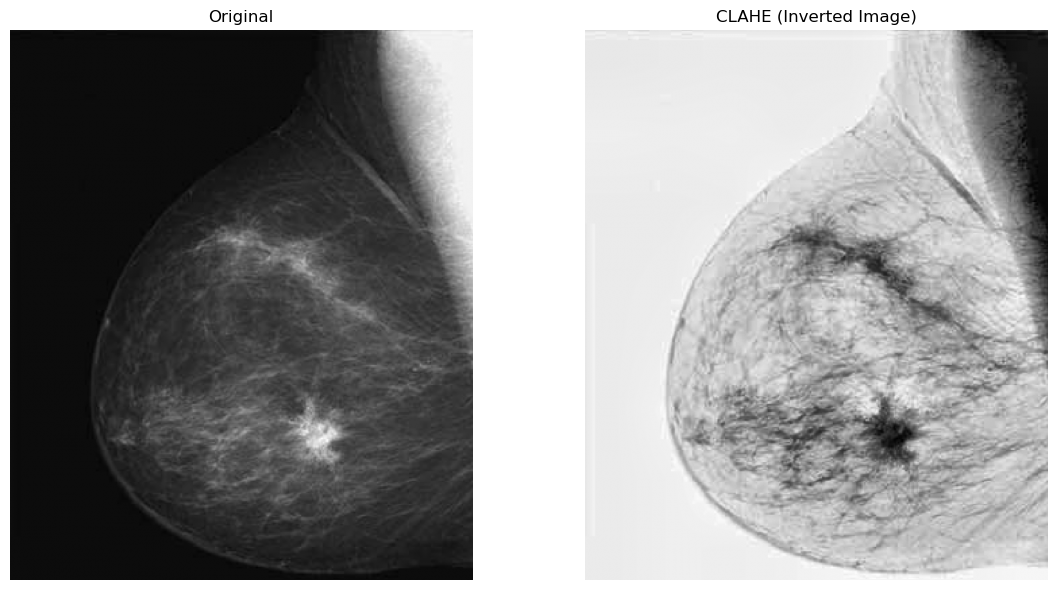

In [58]:
# 1 - Apply CLAHE on inverted image
img_clahe_inv = clahe.apply(img_inverted)
show_comparison(img, img_clahe_inv, 'CLAHE (Inverted Image)')

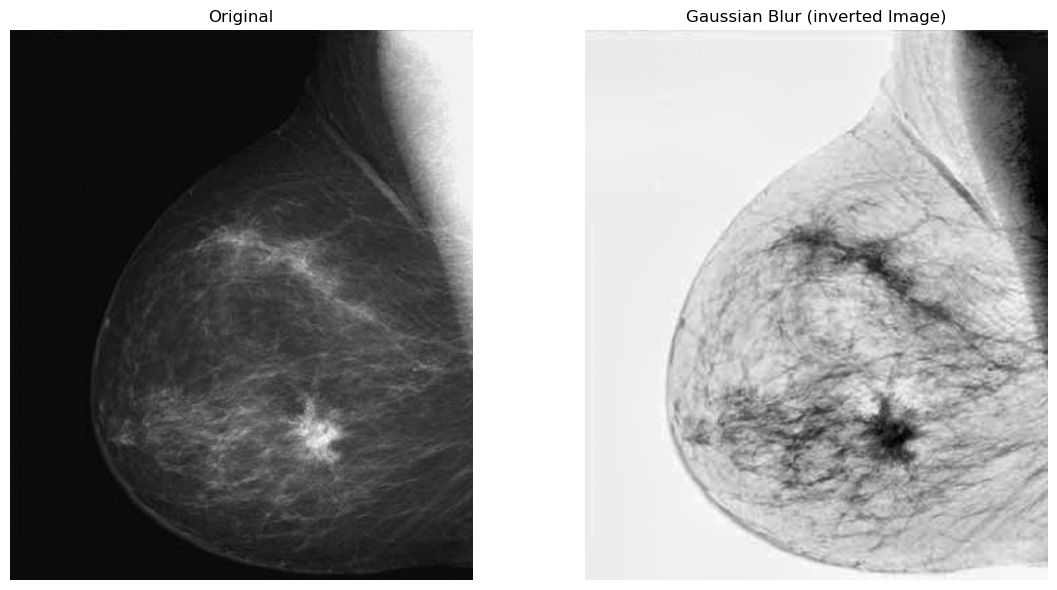

In [59]:
# 2 - Apply Gaussian Blur in CLAHE inverted image
img_blur_inv = cv2.GaussianBlur(img_clahe_inv, (5,5), 0)
show_comparison(img, img_blur_inv, 'Gaussian Blur (inverted Image)')